# <code><h2 style="color:#11B3EB;font-weight: bold; border:2px solid #11B3EB;"><center> Rapport sur le bonheur</center></h2></code>

# <code><div style="color: white;font-weight: bold;text-decoration: underline;font-size: 36px;"> Sommaire
  </div>
  <div style="color: white">
    <ul style="color: white; font-size: 18px">
      <li><a style="color: white" href="#contexte">Contexte</a></li>
      <li><a style="color: white" href="#df">Analyse de la dataframe</a></li>
      <li><a style="color: white" href="#add_col_region">Ajout de la colonne région </a></li>
      <li><a style="color: white" href="#corr">Analyse des corrélations</a ></li>
        <li> <a style="color: white" href="#map">Aperçu du score sur la map</a></li>
        <li> <a style="color: white" href="#top20">Top 20 des pays </a></li>
        <li> <a style="color: white" href="#top10">Top 10 des régions </a> </li>
        <li> <a style="color: white" href="#outlier">Traitement des outliers</a></li>
        <li> <a style="color: white" href="#2015-2022">Ajout de données depuis 2015 </a> </li>
        <li> <a style="color: white" href="#france"> Cas de la France</a> </li>
        <li> <a style="color: white" href="#covid"> Impact de la Covid </a> </li>
        <li> <a style="color: white" href="#wordcloud"> Wordcloud </a> </li>
        <li> <a style="color: white" href="#csv"> Création du csv</a></li>
    </ul>
  </div>
</code>


----

<center> 
    <img src="Data/assets/img.svg"  width="940" height="415">
</center>

<code>
  <div>
    <h4 style="color: white; text-decoration: underline">Source :</h4>
    <ul style="color: white">
      <li>
        <a
          style="color: white; text-decoration: none"
          href="https://fr.wikipedia.org/wiki/Rapport_mondial_sur_le_bonheur"
          >Rapport_mondial_sur_le_bonheur : Wikipedia</a
        >
      </li>
      <li>
        <a
          style="color: white; text-decoration: none"
          href="https://drive.google.com/file/d/1rXaG5T0o-QYGnSZPw3NV-oC1D5Cjq2vF/view"
          >Dataset 2019</a
        >
      </li>
      <li>
        <a
          style="color: white; text-decoration: none"
          href="https://en.wikipedia.org/wiki/Elbow_method_(clustering)"
          >Elbow method</a
        >
      </li>
      <li>
        <a
          style="color: white; text-decoration: none"
          href="https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/"
          >Elbow method</a
        >
      </li>
    </ul>
  </div>
</code>


# <code><div id="contexte" style="color:#F1D405 ;font-weight: bold; border:2px solid #F1D405 ;"><center>Contexte du projet</center></div></code>

Dans cette étude de cas, nous formerons un algorithme d'apprentissage automatique **non supervisé** pour regrouper les pays en fonction de caractéristiques telles que la production économique, le soutien social, l'espérance de vie, la liberté, l'absence de corruption et la générosité.
Le Rapport sur le bonheur dans le monde détermine l'état du bonheur mondial. Les scores de bonheur et les données de classement ont été collectés en demandant aux individus de classer leur vie de 0 (la pire vie possible) à 10 (la meilleure vie possible).

# <code><div style="color:#F1D405 ;font-weight: bold; border:2px solid #F1D405 ;"><center>Imports</center></div><code>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

# <code> <div id="df" style="color:#F1D405 ;font-weight: bold; border:2px solid #F1D405 ;"><center>Analyse de la dataframe</center></div> </code>

In [2]:
df2019 = pd.read_csv('Data/datasets/2019.csv', sep=',')
print(
    f"La dataframe 2019 a {df2019.shape[0]} lignes et {df2019.shape[1]} colonnes")

La dataframe 2019 a 156 lignes et 9 colonnes


In [3]:
df2021 = pd.read_csv('Data/datasets/2021.csv', sep=',')
print(
    f"La dataframe 2021 a {df2021.shape[0]} lignes et {df2021.shape[1]} colonnes")

La dataframe 2021 a 149 lignes et 20 colonnes


<span> On va utiliser la dataframe de 2021 contenant un colonne region pour l'apposer à celle de 2019 pour un traitement ultérieur <span>

In [4]:
df2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [5]:
df2021.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [6]:
df2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [7]:
df2019.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [8]:
df2019.isna().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [9]:
df2021.isna().sum()

Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

# <code> <div id="add_col_region" style="color:#F1D405 ;font-weight: bold; border:2px solid #F1D405 ;"><center>Ajout de la colonne région</center></div> </code>

In [10]:
pd.set_option('mode.chained_assignment', None)

In [11]:
def add_region(df1, df2):
    df = df1.copy()
    df['Region'] = ""
    for i in range(df1.shape[0]):
        if df1['Country or region'][i] in set(df2['Country name']):
            pays = df1['Country or region'][i]
            indexpays = df2[df2['Country name'] == pays].index
            df['Region'].loc[i] = df2['Regional indicator'][indexpays[0]]
    return df


In [12]:
df = add_region(df2019, df2021)

In [13]:
df.shape

(156, 10)

In [14]:
df.head()


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Region
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Western Europe
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Western Europe
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Western Europe
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,Western Europe
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,Western Europe


In [15]:
df['Region'].unique()


array(['Western Europe', 'North America and ANZ',
       'Latin America and Caribbean', 'Middle East and North Africa',
       'Central and Eastern Europe', '', 'Southeast Asia',
       'Commonwealth of Independent States', 'East Asia',
       'Sub-Saharan Africa', 'South Asia'], dtype=object)

In [16]:
df[df['Region'] == '']


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Region
24,25,Taiwan,6.446,1.368,1.430,0.914,0.351,0.242,0.097,
28,29,Qatar,6.374,1.684,1.313,0.871,0.555,0.220,0.167,
38,39,Trinidad & Tobago,6.192,1.231,1.477,0.713,0.489,0.185,0.016,
63,64,Northern Cyprus,5.718,1.263,1.252,1.042,0.417,0.191,0.162,
75,76,Hong Kong,5.430,1.438,1.277,1.122,0.440,0.258,0.287,
94,95,Bhutan,5.082,0.813,1.321,0.604,0.457,0.370,0.167,
111,112,Somalia,4.668,0.000,0.698,0.268,0.559,0.243,0.270,
126,127,Congo (Kinshasa),4.418,0.094,1.125,0.357,0.269,0.212,0.053,
148,149,Syria,3.462,0.619,0.378,0.440,0.013,0.331,0.141,
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,


In [17]:
df.drop(df[df['Region'] == ''].index, inplace=True)


In [18]:
df.rename(columns={'Country or region': 'Country'}, inplace=True)


In [19]:
df.isnull().sum()


Overall rank                    0
Country                         0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
Region                          0
dtype: int64

In [20]:
df.Country.unique()


array(['Finland', 'Denmark', 'Norway', 'Iceland', 'Netherlands',
       'Switzerland', 'Sweden', 'New Zealand', 'Canada', 'Austria',
       'Australia', 'Costa Rica', 'Israel', 'Luxembourg',
       'United Kingdom', 'Ireland', 'Germany', 'Belgium', 'United States',
       'Czech Republic', 'United Arab Emirates', 'Malta', 'Mexico',
       'France', 'Chile', 'Guatemala', 'Saudi Arabia', 'Spain', 'Panama',
       'Brazil', 'Uruguay', 'Singapore', 'El Salvador', 'Italy',
       'Bahrain', 'Slovakia', 'Poland', 'Uzbekistan', 'Lithuania',
       'Colombia', 'Slovenia', 'Nicaragua', 'Kosovo', 'Argentina',
       'Romania', 'Cyprus', 'Ecuador', 'Kuwait', 'Thailand', 'Latvia',
       'South Korea', 'Estonia', 'Jamaica', 'Mauritius', 'Japan',
       'Honduras', 'Kazakhstan', 'Bolivia', 'Hungary', 'Paraguay', 'Peru',
       'Portugal', 'Pakistan', 'Russia', 'Philippines', 'Serbia',
       'Moldova', 'Libya', 'Montenegro', 'Tajikistan', 'Croatia',
       'Dominican Republic', 'Bosnia and Herzegov

# <code><div id="corr" style="color:#F1D405 ;font-weight: bold; border:2px solid #F1D405 ;"><center>Analyse des corrélations</center></div></code>

In [21]:
df.corr()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,1.000000,-0.990596,-0.800040,-0.766732,-0.785850,-0.524394,-0.079826,-0.379026
Score,-0.990596,1.000000,0.795738,0.763818,0.774488,0.536351,0.115728,0.416743
GDP per capita,-0.800040,0.795738,1.000000,0.763336,0.820144,0.363966,-0.070872,0.321384
Social support,-0.766732,0.763818,0.763336,1.000000,0.702723,0.406706,-0.004990,0.213447
Healthy life expectancy,-0.785850,0.774488,0.820144,0.702723,1.000000,0.369862,-0.002343,0.305209
Freedom to make life choices,-0.524394,0.536351,0.363966,0.406706,0.369862,1.000000,0.321748,0.456166
Generosity,-0.079826,0.115728,-0.070872,-0.004990,-0.002343,0.321748,1.000000,0.320608
Perceptions of corruption,-0.379026,0.416743,0.321384,0.213447,0.305209,0.456166,0.320608,1.000000


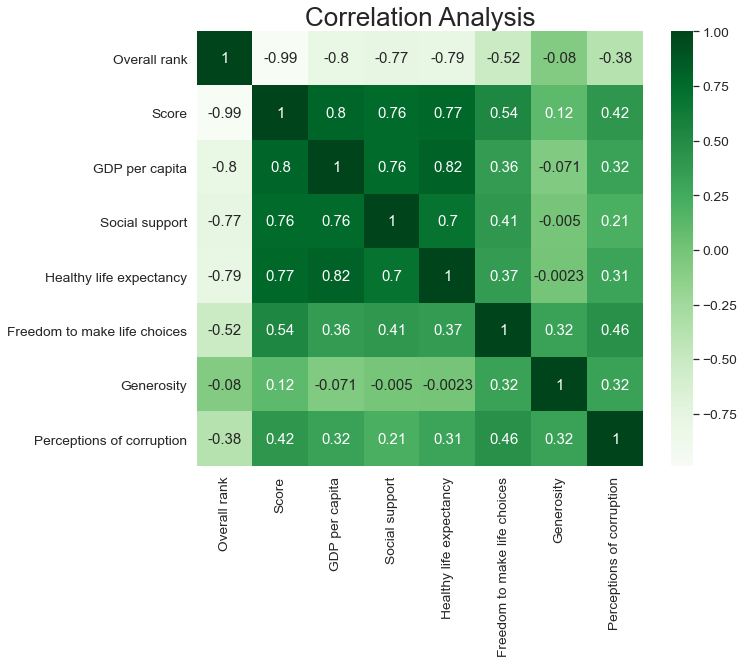

In [22]:
plt.figure(figsize=(10, 8))
sns.set_theme(style="darkgrid", font_scale=1.25)
sns.heatmap(data=df.corr(), annot=True, cmap="Greens")
plt.title('Correlation Analysis', fontsize=26)
plt.show()

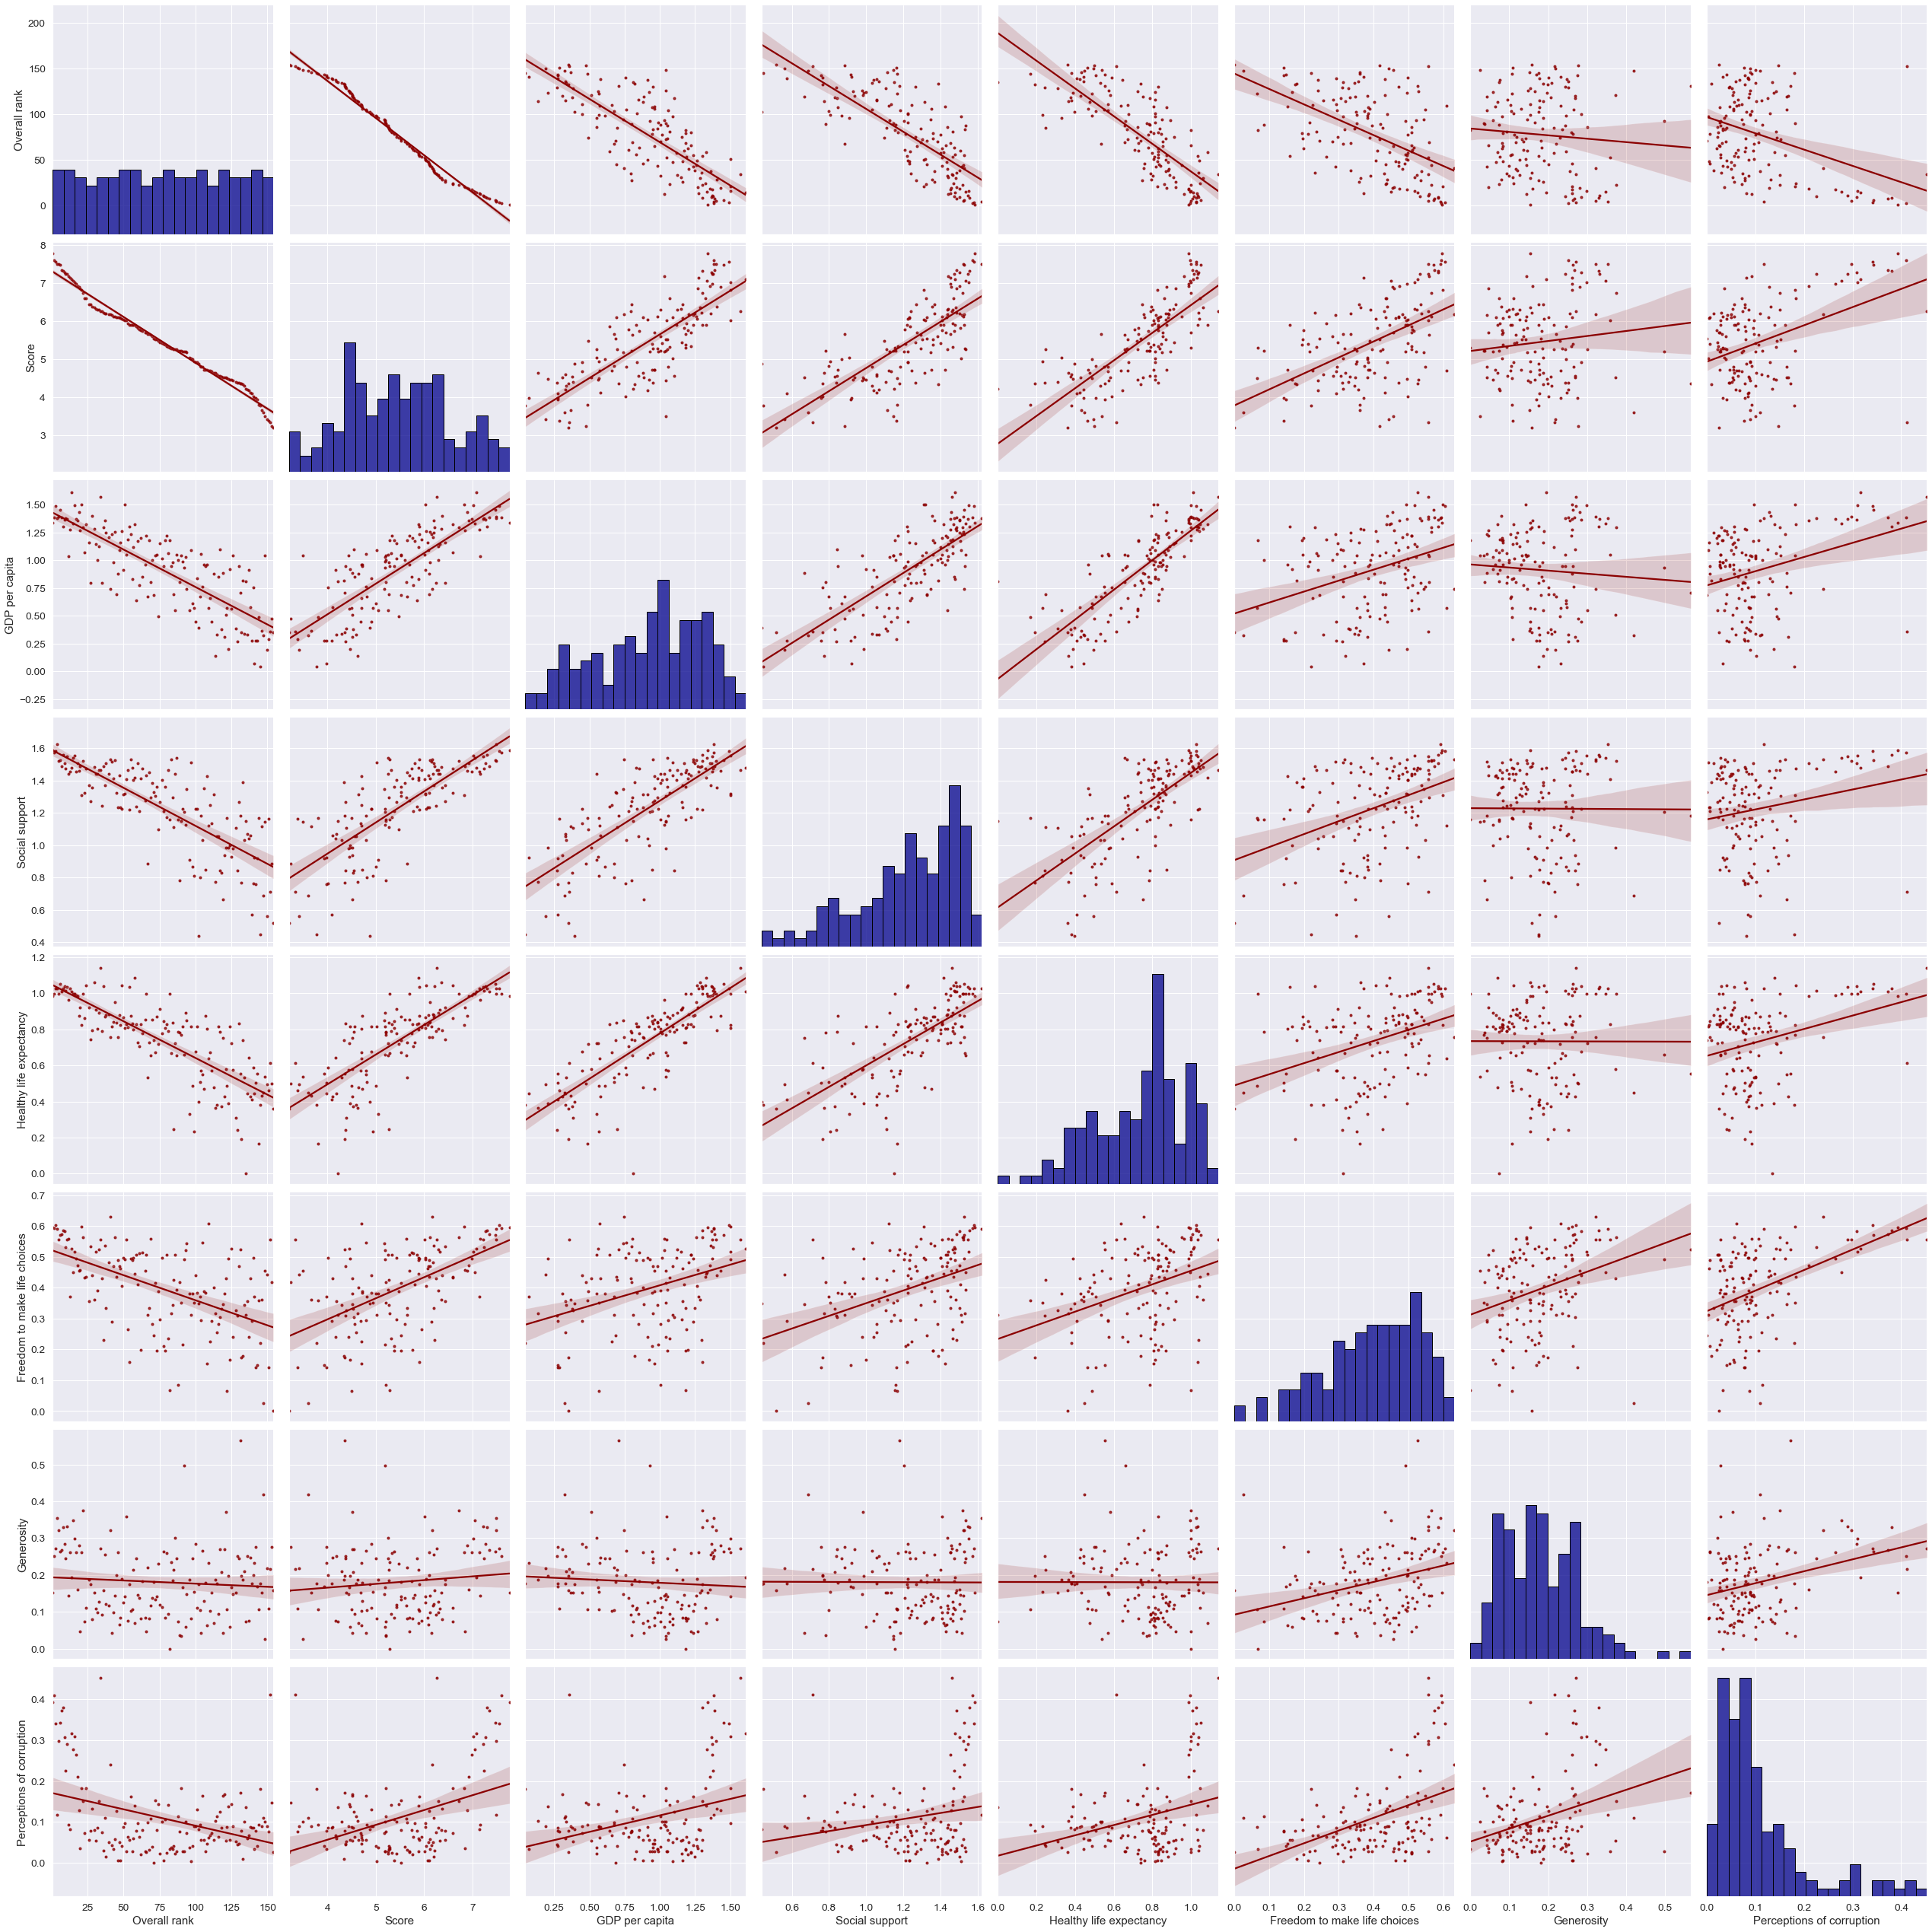

In [23]:
sns.pairplot(data=df, kind='reg', diag_kws={'bins': 20, 'color': 'darkblue', 'edgecolor': 'black'},
             plot_kws={'marker': '.', 'color': 'darkred'}, height=4.5)

<span> On regarde la distribution de la variable score</span>


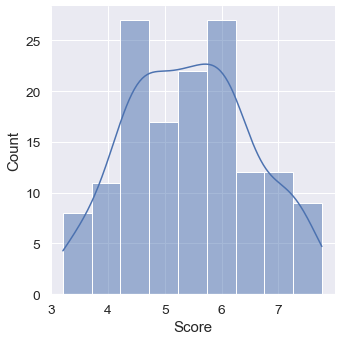

In [24]:
sns.displot(df['Score'], kde=True)

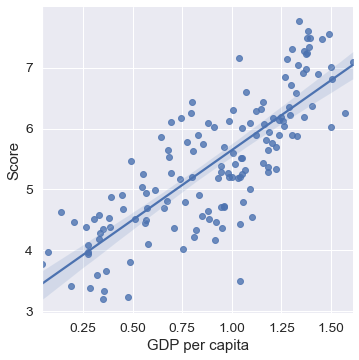

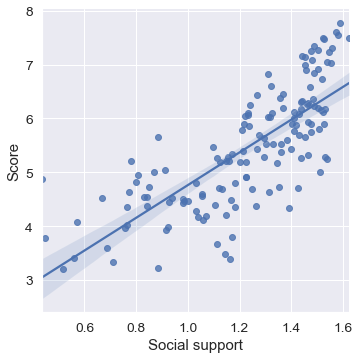

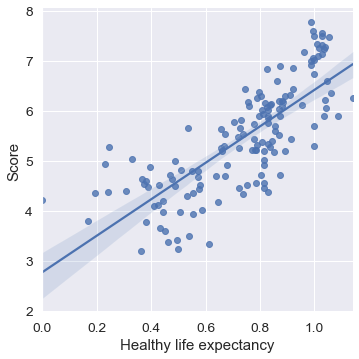

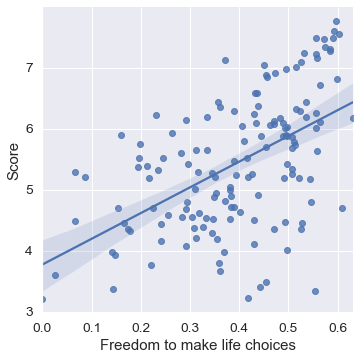

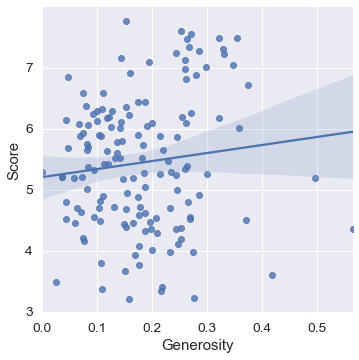

In [25]:
sns.lmplot(data=df, x='GDP per capita', y='Score')
sns.lmplot(data=df, x='Social support', y='Score')
sns.lmplot(data=df, x='Healthy life expectancy', y='Score')
sns.lmplot(data=df, x='Freedom to make life choices', y='Score')
sns.lmplot(data=df, x='Generosity', y='Score')

<p>
On regarde si les corrélations sont linéaires avec la variable score . 

On peut constater que sur l'echantillon choisi ce n'est pas toujours le cas .

On peut noter que les indicateurs économique composante de l '[IDH](https://fr.wikipedia.org/wiki/Indice_de_d%C3%A9veloppement_humain) ( Indice de Développement Humain ) tel que le PBI / habitants , le soutien social , l'espèrance de vie sont fortement corrélé avec le score et sont donc une composante importante de ce dernier. 

On peut en déduire que dans "les pays les plus développés" les habitants y sont plus heureux .
Tandis que des indicateurs plus subjectif et plus difficile à mesurer comme la générosité , la liberté des choix de vie , la corruption rapporté au score ne sont pas corrélé fortement. 
</p>

# <code><div id="map" style="color:#F1D405 ;font-weight: bold; border:2px solid #F1D405 ;"><center>Aperçu du score sur une carte du monde</center></div></code>

In [26]:
df_map = df.copy()
df_map.tail()

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Region
149,150,Malawi,3.410,0.191,0.560,0.495,0.443,0.218,0.089,Sub-Saharan Africa
150,151,Yemen,3.380,0.287,1.163,0.463,0.143,0.108,0.077,Middle East and North Africa
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,Sub-Saharan Africa
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,Sub-Saharan Africa
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,South Asia


In [27]:
colorRange = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],[0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = dict(type = 'choropleth', 
           locations = df_map['Country'],
           locationmode = 'country names',
           z = df_map['Score'], 
            colorscale = colorRange,
           text = df_map['Country'],
           
            marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) )
            
            ,
           colorbar = {'title':'Happiness Score'})

layout = dict(title = 'World Happiness Visualization on Map', 
             geo = dict(showframe = False, 
                       ))

choromap3 = go.Figure(data = [data], layout=layout)

iplot(choromap3)

<span> 
Sur la carte on voit que la concentration de bonheur est plus élevé dans la partie de l'hémisphère Nord avec pour Exception l'Australie et la Nouvelle Zélande
</span>

# <code><div id="top20" style="color:#F1D405 ;font-weight: bold; border:2px solid #F1D405 ;"><center> Top 20 pays</center></div></code>

In [28]:
top20 = df.nlargest(20, 'Score')

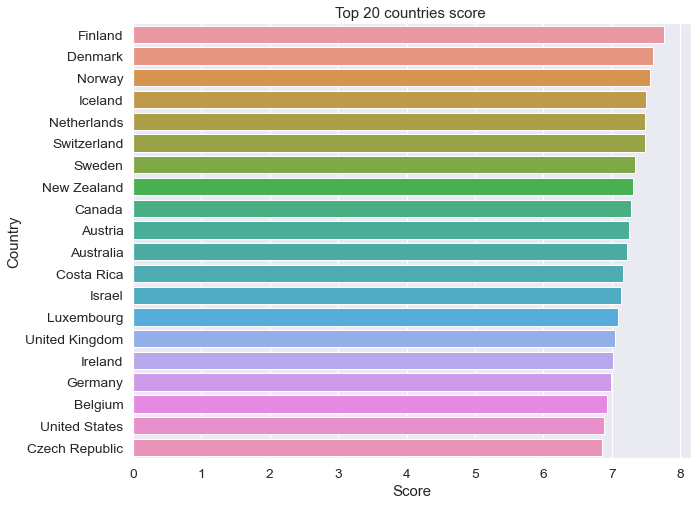

In [29]:
plt.figure(figsize=(10, 8))
sns.set_theme(style="darkgrid", font_scale=1.25)
sns.barplot(data=top20, x=top20.Score, y=top20['Country'])
plt.title('Top 20 countries score ')
plt.show()

<span>

 On constate que 6 pays ( Finlande , Danemark , Norvège , Islande , Pays-bas , Suisse) se détachent particulièrement du lot , principalement des pays d'Europe du Nord. 

</span>


# <code><div id='top10' style="color:#F1D405 ;font-weight: bold; border:2px solid #F1D405 ;"><center> Top 10 region</center></div></code>

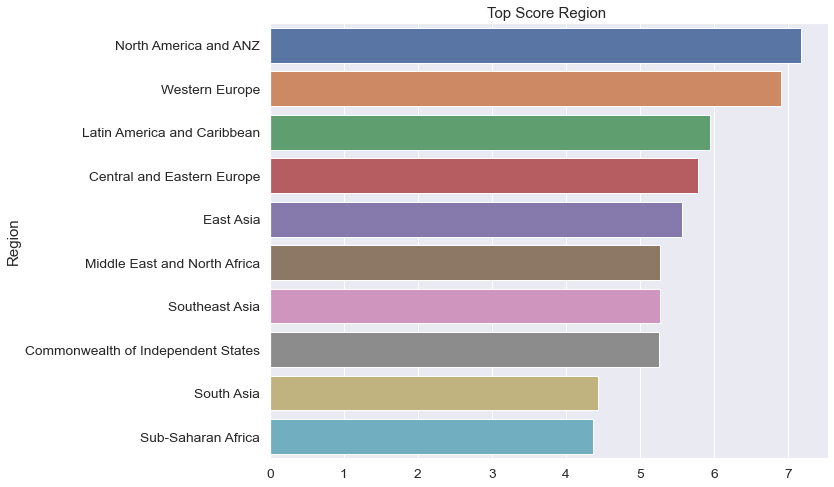

In [30]:
df['Region'].unique()
top10_region = df.groupby(
    'Region')['Score'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 8))
sns.set_theme(style="darkgrid", font_scale=1.25)
sns.barplot(x=top10_region.values, y=top10_region.index, orient='h')
plt.title('Top Score Region ')
plt.show()

<span> Deux régions se détachent L'amerique du Nord et l'Europe de l'ouest </span>


# <code><div  id="outlier" style="color:#F1D405 ;font-weight: bold; border:2px solid #F1D405 ;"><center> Valeur abberantes et atypiques</center></div> </code>

In [31]:
df_boxplot = df.copy()
df_boxplot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 153
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  145 non-null    int64  
 1   Country                       145 non-null    object 
 2   Score                         145 non-null    float64
 3   GDP per capita                145 non-null    float64
 4   Social support                145 non-null    float64
 5   Healthy life expectancy       145 non-null    float64
 6   Freedom to make life choices  145 non-null    float64
 7   Generosity                    145 non-null    float64
 8   Perceptions of corruption     145 non-null    float64
 9   Region                        145 non-null    object 
dtypes: float64(7), int64(1), object(2)
memory usage: 12.5+ KB


[Text(0, 0, 'GDP per capita'),
 Text(1, 0, 'Social support'),
 Text(2, 0, 'Healthy life expectancy'),
 Text(3, 0, 'Freedom to make life choices'),
 Text(4, 0, 'Generosity'),
 Text(5, 0, 'Perceptions of corruption')]

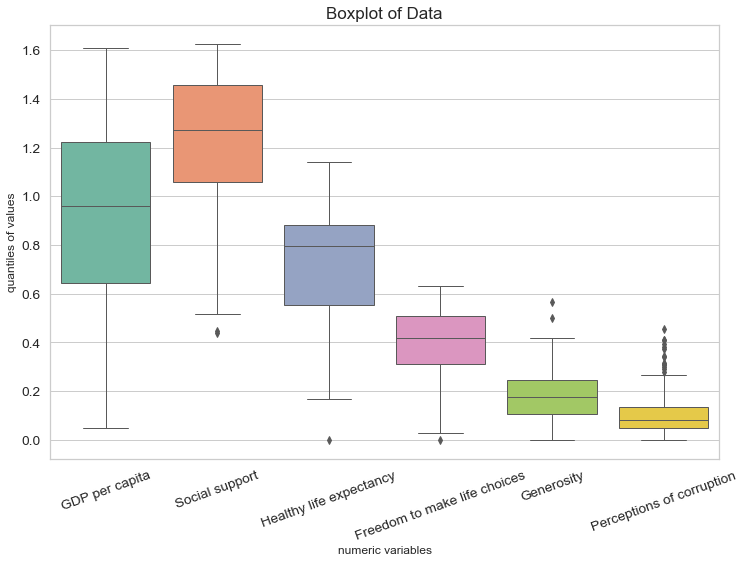

In [32]:
sns.set(rc={'figure.figsize': (12, 8)})
sns.set_theme(style="whitegrid", font_scale=1.25)

ax = sns.boxplot(data=df_boxplot.drop(
    columns=['Overall rank', 'Score']), linewidth=1, palette="Set2")
ax.set_title('Boxplot of Data', fontsize=17)
ax.set_xlabel('numeric variables', fontsize=12)
ax.set_ylabel('quantiles of values', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20)


<span> Dans cette étude on voit qu'il y a des valeurs atypiques mais je choisis de ne pas les retirer pour ne pas fausser le reste de l'analyse et lisser trop les résultats</span>


# <code><div id="2015-2022" style="color:#F1D405 ;font-weight: bold; border:2px solid #F1D405 ;"><center>Ajout des données depuis 2015 à 2022</center></div> </code>

In [33]:
df2015 = pd.read_csv('Data/datasets/2015.csv',sep=',')
df2016 = pd.read_csv('Data/datasets/2016.csv',sep=',')
df2017 = pd.read_csv('Data/datasets/2017.csv',sep=',')
df2018 = pd.read_csv('Data/datasets/2018.csv',sep=',')
df2019 = pd.read_csv('Data/datasets/2019.csv',sep=',')
df2020 = pd.read_csv('Data/datasets/2020.csv',sep=',')
df2021 = pd.read_csv('Data/datasets/2021.csv',sep=',')
df2022 = pd.read_csv('Data/datasets/2022.csv',sep=',')

In [34]:
df2015_top = df2015.iloc[0:3][['Country','Happiness Score']].rename(columns={'Happiness Score':'Score'})
df2015_top['Annee'] = 2015
df2016_top = df2016.iloc[0:3][['Country','Happiness Score']].rename(columns={'Happiness Score':'Score'})
df2016_top['Annee'] = 2016
df2017_top = df2017.iloc[0:3][['Country','Happiness.Score']].rename(columns={'Happiness.Score':'Score'})
df2017_top['Annee'] = 2017
df2018_top = df2018.iloc[0:3][['Country or region','Score']].rename(columns={'Country or region':'Country'})
df2018_top['Annee'] = 2018
df2019_top = df2019.iloc[0:3][['Country or region','Score']].rename(columns={'Country or region':'Country','Score':'Score'})
df2019_top['Annee'] = 2019
df2020_top5 = df2020.iloc[0:3][['Country name','Ladder score']].rename(columns={'Country name':'Country','Ladder score':'Score'})
df2020_top5['Annee'] = 2020
df2021_top = df2021.iloc[0:3][['Country name','Ladder score']].rename(columns={'Country name':'Country','Ladder score':'Score'})
df2021_top['Annee'] = 2021
df2022_top = df2022.iloc[0:3][['Country','Happiness score']].rename(columns={'Happiness score':'Score'})
df2022_top['Annee'] = 2022
df2022_top['Score'] = df2022_top['Score'].str.replace(',', '.').astype(float)

In [35]:
df_monde_top = pd.concat([df2015_top, df2016_top, df2017_top, df2018_top, df2019_top, df2020_top5, df2021_top, df2022_top])

In [36]:
df_monde_top.set_index('Annee', inplace=True)

In [37]:
df_monde_top

,Country,Score
Annee,,
2015,Switzerland,7.5870
2015,Iceland,7.5610
2015,Denmark,7.5270
2016,Denmark,7.5260
2016,Switzerland,7.5090
2016,Iceland,7.5010
2017,Norway,7.5370
2017,Denmark,7.5220
2017,Iceland,7.5040


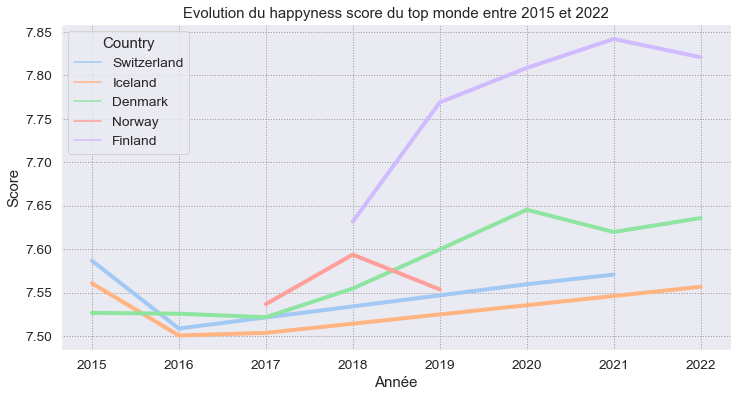

In [38]:
plt.figure(figsize=(12,6))
sns.set_theme(style="whitegrid", palette="pastel",font_scale=1.25)
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.lineplot(data=df_monde_top, x='Annee', y='Score', hue='Country',linewidth = 4)
plt.xlabel("Année")
plt.ylabel("Score")
plt.title("Evolution du happyness score du top monde entre 2015 et 2022")
plt.show()

In [39]:
fig = px.line(df_monde_top, x=df_monde_top.index, y="Score", color="Country",
title="Evolution du happyness score du top monde entre 2015 et 2022",height=600)
fig.update_traces(line=dict(width=4))
fig.update_layout(
        title=dict(
            text='<b>Evolution du happyness score du top monde entre 2015 et 2022</b>',
            x=0.5,
            y=0.95,
            font=dict(size=20)),
        xaxis_title="<b>Annee</b>",
        yaxis_title='<b>Score</b>',
        font=dict(size=12)
    )
fig.show()

<p>
Sur 6 ans on constate qu'il y a 3 pays (Islande , Suisse , Danemark ) toujours présent dans le top 3 des pays les plus heureux.

La Norvège fait une apparition dans le top 3 entre 2017 et 2019 avec un top score en 2018 de 7.59.

La Finlande fait une entrée en 2018 avec un score 7.63 et se place en leader durant ses dernières années avec un pic à 7.84
</p>


# <code><div id="france" style="color:#F1D405 ;font-weight: bold; border:2px solid #F1D405 ;"><center>Analyse du cas de la France entre 2015 et 2022</center></div> </code>

In [40]:
df2015_f = df2015[df2015['Country'] == 'France'][['Happiness Score']]
df2015_f.rename(columns={'Happiness Score':'Score'}, inplace=True)
df2015_f['Annee'] = 2015
df2016_f = df2016[df2016['Country'] == 'France'][['Happiness Score']]
df2016_f.rename(columns={'Happiness Score':'Score'}, inplace=True)
df2016_f['Annee'] = 2016
df2017_f = df2017[df2017['Country'] == 'France'][['Happiness.Score']]
df2017_f.rename(columns={'Happiness.Score':'Score'}, inplace=True)
df2017_f['Annee'] = 2017
df2018_f = df2018[df2018['Country or region'] == 'France'][['Score']]
df2018_f['Annee'] = 2018
df2019_f = df2019[df2019['Country or region'] == 'France'][['Score']]
df2019_f['Annee'] = 2019
df2020_f = df2020[df2020['Country name'] == 'France'][['Ladder score']]
df2020_f.rename(columns={'Ladder score':'Score'}, inplace=True)
df2020_f['Annee'] = 2020
df2021_f = df2021[df2021['Country name'] == 'France'][['Ladder score']]
df2021_f.rename(columns={'Ladder score':'Score'}, inplace=True)
df2021_f['Annee'] = 2021
df2022_f = df2022[df2022['Country'] == 'France'][['Happiness score']]
df2022_f.rename(columns={'Happiness score':'Score'}, inplace=True)
df2022_f['Score'] = df2022_f['Score'].str.replace(',', '.').astype(float)
df2022_f['Annee'] = 2022

In [41]:
df_France = pd.concat([df2015_f,df2016_f,df2017_f,df2018_f,df2019_f,df2020_f,df2021_f,df2022_f],ignore_index=True)

In [42]:
df_France.set_index('Annee', inplace=True)

In [43]:
df_France

,Score
Annee,
2015,6.5750
2016,6.4780
2017,6.4420
2018,6.4890
2019,6.5920
2020,6.6638
2021,6.6900
2022,6.6870


In [44]:
df_France['Score'] = pd.to_numeric(df_France['Score'])

In [45]:
df_France.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 2015 to 2022
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Score   8 non-null      float64
dtypes: float64(1)
memory usage: 128.0 bytes


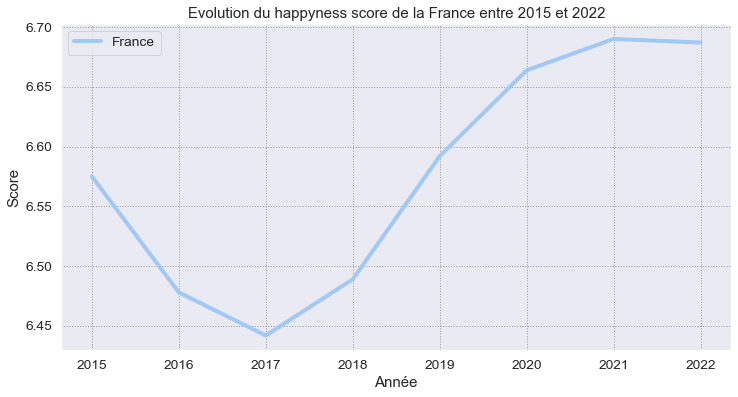

In [46]:
plt.figure(figsize=(12,6))
sns.set_theme(style="whitegrid", palette="pastel",font_scale=1.25)
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.lineplot(data=df_France , y=df_France.Score, x=df_France.index,label='France',linewidth = 4)
plt.xlabel("Année")
plt.ylabel("Score")
plt.title("Evolution du happyness score de la France entre 2015 et 2022")
plt.show()

<span>

Chute de 2015 à 2017 probablement causé par les  multiples attentats perpétré sur le territoire nationale .

Reprise en 2018 probablement dû a la victoire de l'equipe de France de foot .

Depuis 2018 la courbe du bonheur ne cesse de grimper jusqu'à 2021 . 

En 2021 on constate un ralentissement probablement due à la crise Covid.

</span>

# <code><div id="covid" style="color:#F1D405 ;font-weight: bold; border:2px solid #F1D405 ;"><center>Impact de la Covid sur le bonheur </center></div> </code>

In [47]:
drop_col = ["RANK","Whisker-high", "Whisker-low","Dystopia (1.83) + residual"]

In [48]:
df2022_w = df2022.copy()

In [49]:
df2022_w.rename(columns={'Happiness score':'Score'},inplace=True)
df2022_w.drop(columns=drop_col, inplace=True)
df2022_w  = df2022_w.iloc[0:5]
df2022_w.shape

(5, 8)

In [50]:
df2022_w.set_index('Country', inplace=True)
list_country2022 = df2022_w.index.to_list()
list_country2022

['Finland', 'Denmark', 'Iceland', 'Switzerland', 'Netherlands']

In [51]:
corona_dataset_csv = pd.read_csv("Data/datasets/time_series_covid19_confirmed_global.csv")
corona_dataset_csv.drop(["Lat", "Long"], axis = 1, inplace = True)
corona_dataset_csv.rename(columns={"Country/Region": "Country"}, inplace = True)
corona_dataset_csv.shape

(284, 802)

In [52]:
aggregated_corona_dataset = corona_dataset_csv.groupby("Country").sum()

In [53]:
countries = list(aggregated_corona_dataset.index)
max_infection_rates = []
for c in countries:
    max_infection_rates.append(aggregated_corona_dataset.loc[c].diff().max())
aggregated_corona_dataset["max_infection_rates"] = max_infection_rates

In [54]:
corona_data = pd.DataFrame(aggregated_corona_dataset["max_infection_rates"])
corona_data.head()

,max_infection_rates
Country,
Afghanistan,3243.0
Albania,4789.0
Algeria,2521.0
Andorra,2313.0
Angola,5035.0


In [55]:
corona_data = corona_data[corona_data.index.isin(list_country2022)]

In [56]:
final_data = corona_data.join(df2022_w)
final_data

,max_infection_rates,Score,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
Country,,,,,,,,
Denmark,55709.0,"7,636","1,953","1,243","0,777","0,719","0,188","0,532"
Finland,26848.0,"7,821","1,892","1,258","0,775","0,736","0,109","0,534"
Iceland,7408.0,"7,557","1,936","1,320","0,803","0,718","0,270","0,191"
Netherlands,380498.0,"7,415","1,945","1,206","0,787","0,651","0,271","0,419"
Switzerland,89462.0,"7,512","2,026","1,226","0,822","0,677","0,147","0,461"


In [57]:
final_data['Score'] = final_data['Score'].str.replace(',', '.').astype(float)
final_data['Explained by: GDP per capita']  = final_data['Explained by: GDP per capita'].str.replace(',', '.').astype(float)
final_data['Explained by: Social support'] = final_data['Explained by: Social support'].str.replace(',', '.').astype(float)
final_data['Explained by: Healthy life expectancy'] = final_data['Explained by: Healthy life expectancy'].str.replace(',', '.').astype(float)
final_data['Explained by: Generosity'] = final_data['Explained by: Generosity'].str.replace(',', '.').astype(float)
final_data['Explained by: Freedom to make life choices'] = final_data['Explained by: Freedom to make life choices'].str.replace(',', '.').astype(float)
final_data['Explained by: Perceptions of corruption'] = final_data['Explained by: Perceptions of corruption'].str.replace(',', '.').astype(float)

In [58]:
final_data.corr()

,max_infection_rates,Score,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
max_infection_rates,1.000000,-0.684102,0.107141,-0.710182,-0.072524,-0.868495,0.479397,0.078128
Score,-0.684102,1.000000,-0.603780,0.331979,-0.534289,0.886284,-0.725395,0.419392
Explained by: GDP per capita,0.107141,-0.603780,1.000000,-0.365691,0.809184,-0.558212,-0.008173,0.001327
Explained by: Social support,-0.710182,0.331979,-0.365691,1.000000,0.069135,0.678223,0.191384,-0.690055
Explained by: Healthy life expectancy,-0.072524,-0.534289,0.809184,0.069135,1.000000,-0.414035,0.098336,-0.443599
Explained by: Freedom to make life choices,-0.868495,0.886284,-0.558212,0.678223,-0.414035,1.000000,-0.441858,0.061210
Explained by: Generosity,0.479397,-0.725395,-0.008173,0.191384,0.098336,-0.441858,1.000000,-0.729566
Explained by: Perceptions of corruption,0.078128,0.419392,0.001327,-0.690055,-0.443599,0.061210,-0.729566,1.000000


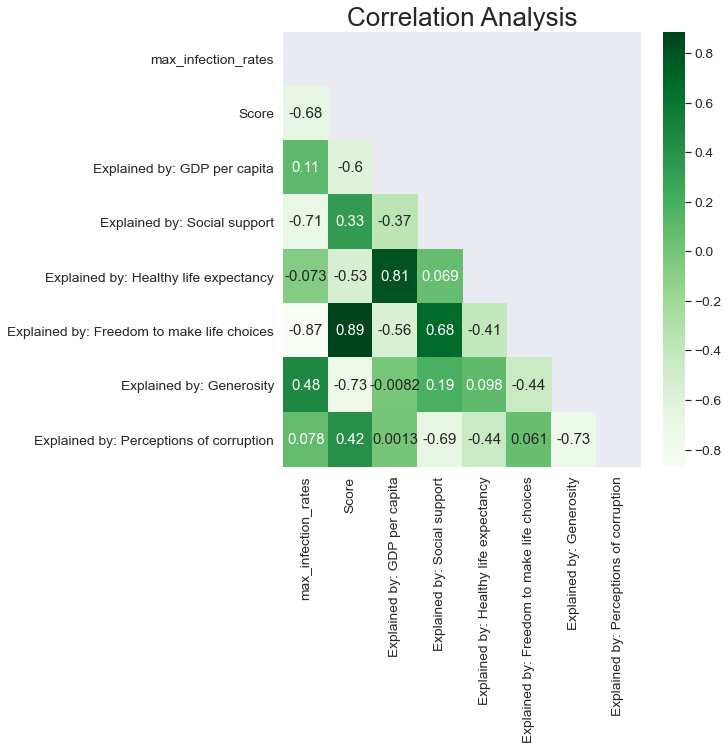

In [59]:
mask = np.triu(np.ones_like(final_data.corr(), dtype=bool))
plt.figure(figsize=(8, 8))
sns.set_theme(style="darkgrid", font_scale=1.25)
sns.heatmap(final_data.corr(),annot=True, mask=mask,cmap="Greens")
plt.title('Correlation Analysis', fontsize=26)
plt.show()

<p> Le taux d'infection au covid semble agir négativement sur le score </p>

Text(0.5, 1.0, 'Relationship Between Corona Infection Rate and GDP per Capita')

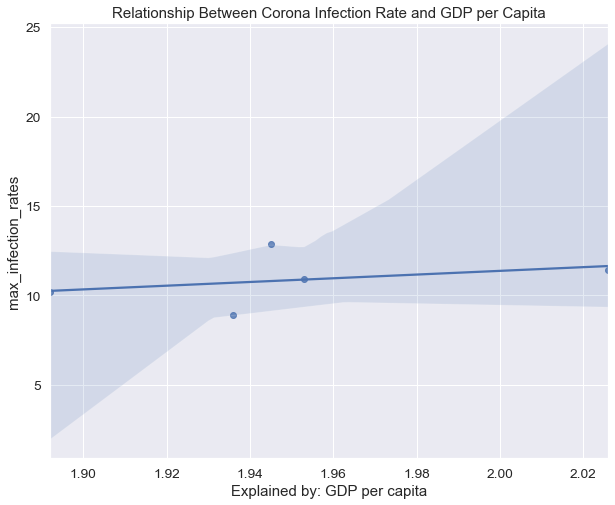

In [60]:
plt.figure(figsize=(10, 8))
sns.set_theme(style="darkgrid", font_scale=1.25)
sns.regplot(data=final_data ,x=final_data["Explained by: GDP per capita"],y=np.log(final_data["max_infection_rates"]))
plt.title("Relationship Between Corona Infection Rate and GDP per Capita")

<p> Pas de correlation ici les deux variables semblent indépendantes</p>

Text(0.5, 1.0, 'Relationship Between Corona Infection Rate and Social support')

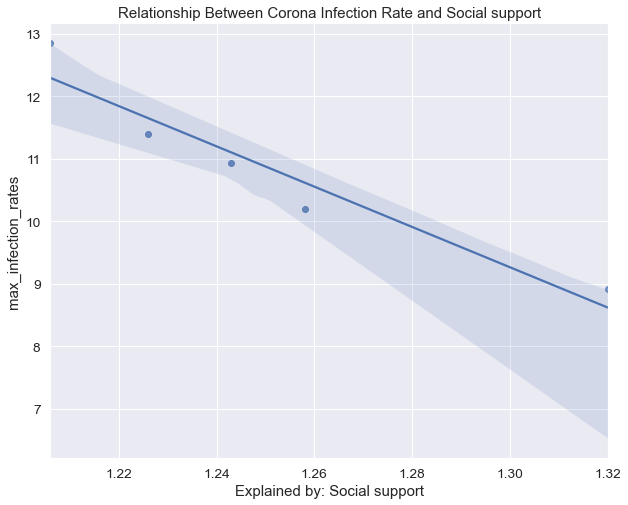

In [61]:
plt.figure(figsize=(10, 8))
sns.set_theme(style="darkgrid", font_scale=1.25)
sns.regplot(data=final_data ,x=final_data["Explained by: Social support"],y=np.log(final_data["max_infection_rates"]))
plt.title("Relationship Between Corona Infection Rate and Social support")

<span> Corrélation négative forte entre les deux variables </span>

<p> 
Pour conclure on peut dire que la Covid a eu un effet négatif sur le bonheur au vu de l'échantillon choisi.
Les variables sont soit peu corrélés (PIB/HAB) , le plus souvent corrélès de manière négative et dans certain cas de manière forte comme par exemple les variables "Social Support" ou "Freedom to make life choices"
</p>

# <code><div id="wordcloud" style="color:#F1D405;font-weight: bold; border:2px solid #F1D405;"><center>Wordcloud</center></div></code>

In [62]:
country_name = df_boxplot["Country"].head(50)

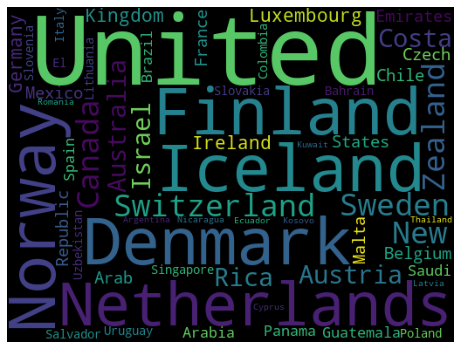

In [63]:
plt.subplots(figsize=(8, 8))
wordcloud = WordCloud(
    background_color='black',
    width=512,
    height=384
).generate(" ".join(country_name))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


 <p>Nuage de mot avec les pays ayant les scores les plus élevés</p> 

# <code> <div id="csv" style="color:#F1D405;font-weight: bold; border:2px solid #F1D405;"><center>Création du csv pour l'analyse</center></div> </code>

In [64]:
df_boxplot.to_csv('Data/datasets/Rapport-bonheur.csv', index=False)